## импорт

In [1]:
import torch
import torch.nn as nn
import json
from utils.model_utils import create_model_from_config, train_model, FullyConnectedModel, count_parameters
from utils.experiment_utils import get_mnist_loaders
from utils.visualization_utils import plot_training_history, plot_confusion_matrix, plot_weights_distribution
from sklearn.model_selection import GridSearchCV

## 1.1 Сравнение моделей разной глубины и анализ переобучения


По заданию создадим базовые нейронные сети и JSON конфиги для них. Все утилиты для создания и обучения модели находятся в файле model_utils.py, утилиты для визуализации - в visualization_utils.py, для тестирования и проведения экспериментов - experiments_utils.py

Поскольку на одну эпоху обучения и тестирования тратится примерно 10 секунд, выберем 5 эпох для всех 5 моделей. Всего потребовалось 275 секунды для работы алгоритма.

100%|██████████| 10/10 [00:01<00:00,  6.78it/s]


Epoch 1/5:
Train Loss: 0.5262, Train Acc: 0.8473
Test Loss: 0.3001, Test Acc: 0.9153
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.61it/s]


Epoch 2/5:
Train Loss: 0.3004, Train Acc: 0.9145
Test Loss: 0.2803, Test Acc: 0.9220
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.72it/s]


Epoch 3/5:
Train Loss: 0.2829, Train Acc: 0.9204
Test Loss: 0.2744, Test Acc: 0.9213
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.55it/s]


Epoch 4/5:
Train Loss: 0.2771, Train Acc: 0.9228
Test Loss: 0.2727, Test Acc: 0.9226
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.74it/s]


Epoch 5/5:
Train Loss: 0.2713, Train Acc: 0.9237
Test Loss: 0.2759, Test Acc: 0.9238
--------------------------------------------------
Model: 1 линейный слой
Model parameters: 203530


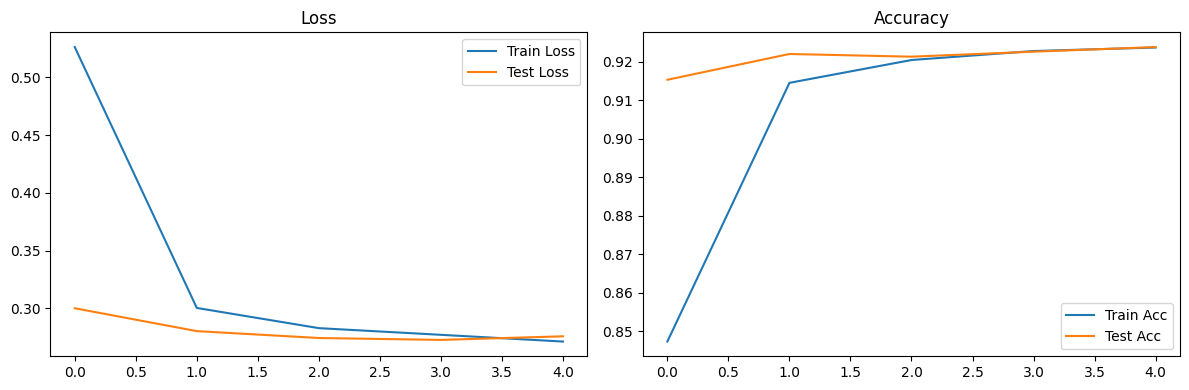

100%|██████████| 10/10 [00:01<00:00,  6.68it/s]


Epoch 1/5:
Train Loss: 0.5339, Train Acc: 0.8517
Test Loss: 0.3016, Test Acc: 0.9112
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.72it/s]


Epoch 2/5:
Train Loss: 0.2966, Train Acc: 0.9153
Test Loss: 0.2814, Test Acc: 0.9185
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Epoch 3/5:
Train Loss: 0.2855, Train Acc: 0.9188
Test Loss: 0.2845, Test Acc: 0.9169
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.63it/s]


Epoch 4/5:
Train Loss: 0.2789, Train Acc: 0.9219
Test Loss: 0.2774, Test Acc: 0.9206
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Epoch 5/5:
Train Loss: 0.2730, Train Acc: 0.9239
Test Loss: 0.2762, Test Acc: 0.9206
--------------------------------------------------
Model: 2 линейных слоя
Model parameters: 235146


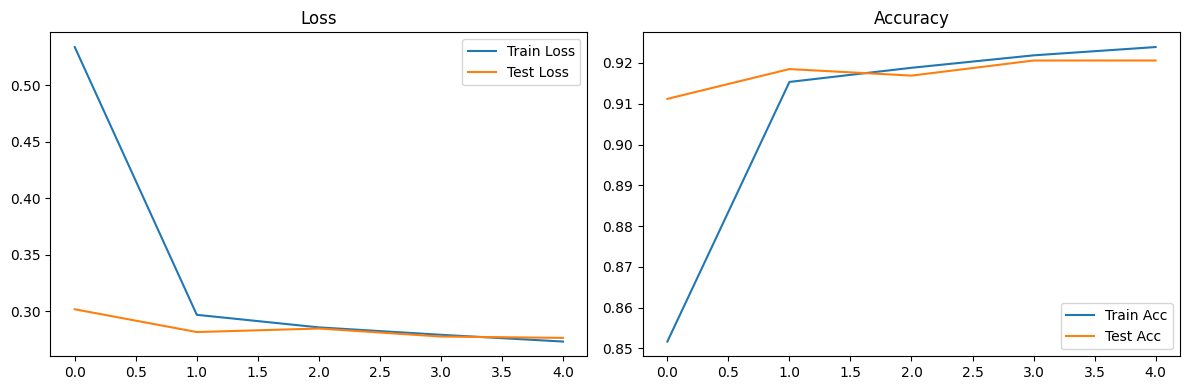

100%|██████████| 10/10 [00:01<00:00,  6.61it/s]


Epoch 1/5:
Train Loss: 0.5772, Train Acc: 0.8350
Test Loss: 0.3065, Test Acc: 0.9144
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.60it/s]


Epoch 2/5:
Train Loss: 0.2998, Train Acc: 0.9143
Test Loss: 0.2934, Test Acc: 0.9163
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.68it/s]


Epoch 3/5:
Train Loss: 0.2878, Train Acc: 0.9185
Test Loss: 0.2869, Test Acc: 0.9173
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.61it/s]


Epoch 4/5:
Train Loss: 0.2790, Train Acc: 0.9218
Test Loss: 0.2739, Test Acc: 0.9213
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.64it/s]


Epoch 5/5:
Train Loss: 0.2769, Train Acc: 0.9224
Test Loss: 0.2803, Test Acc: 0.9195
--------------------------------------------------
Model: 3 линейных слоя
Model parameters: 242762


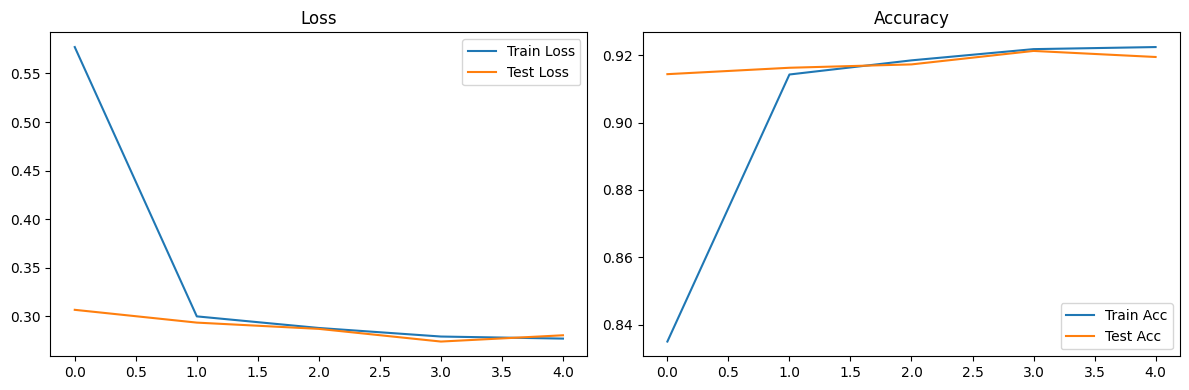

100%|██████████| 10/10 [00:01<00:00,  6.49it/s]


Epoch 1/5:
Train Loss: 0.8235, Train Acc: 0.7426
Test Loss: 0.3694, Test Acc: 0.8966
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.69it/s]


Epoch 2/5:
Train Loss: 0.3367, Train Acc: 0.9053
Test Loss: 0.2982, Test Acc: 0.9177
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.11it/s]


Epoch 3/5:
Train Loss: 0.3005, Train Acc: 0.9150
Test Loss: 0.2896, Test Acc: 0.9163
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.79it/s]


Epoch 4/5:
Train Loss: 0.2870, Train Acc: 0.9195
Test Loss: 0.2906, Test Acc: 0.9165
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.58it/s]


Epoch 5/5:
Train Loss: 0.2811, Train Acc: 0.9215
Test Loss: 0.2835, Test Acc: 0.9201
--------------------------------------------------
Model: 5 линейных слоя
Model parameters: 244890


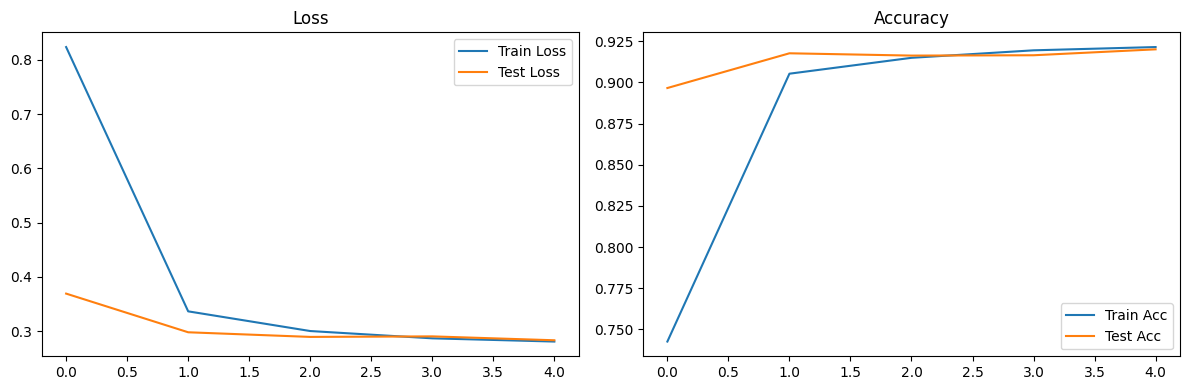

100%|██████████| 10/10 [00:01<00:00,  6.53it/s]


Epoch 1/5:
Train Loss: 1.3406, Train Acc: 0.5117
Test Loss: 0.8375, Test Acc: 0.7476
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.12it/s]


Epoch 2/5:
Train Loss: 0.7757, Train Acc: 0.7663
Test Loss: 0.7008, Test Acc: 0.7878
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.55it/s]


Epoch 3/5:
Train Loss: 0.6761, Train Acc: 0.8014
Test Loss: 0.6307, Test Acc: 0.8161
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Epoch 4/5:
Train Loss: 0.6027, Train Acc: 0.8279
Test Loss: 0.5689, Test Acc: 0.8393
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.65it/s]


Epoch 5/5:
Train Loss: 0.5435, Train Acc: 0.8485
Test Loss: 0.5171, Test Acc: 0.8599
--------------------------------------------------
Model: 7 линейных слоя
Model parameters: 244942


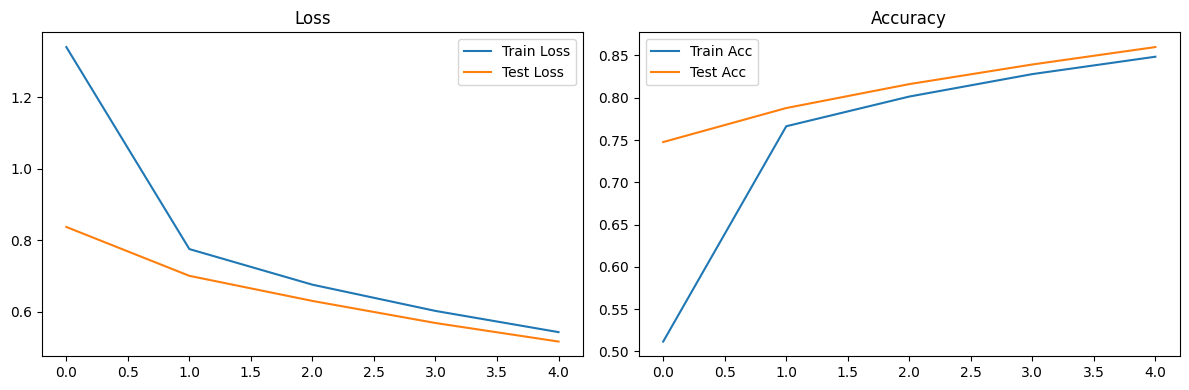

'\nnn_layer_1.json\nnn_layer_2.json\nnn_layer_3.json\nnn_layer_5.json\nnn_layer_7.json\n'

In [2]:
def train_input_model(path:str, name:str, device=torch.device('cuda:0')):
    model = create_model_from_config(path)
    model = nn.DataParallel(model)
    model.to(device)
    train_loader, test_loader = get_mnist_loaders(batch_size=1024)
    epochs = 5
    history = train_model(model, train_loader, test_loader, False, epochs=epochs, device=str(device))
    print(f"Model: {name}")
    print(f"Model parameters: {count_parameters(model)}")
    plot_training_history(history)

torch.backends.cudnn.benchmark = True
train_input_model('configs/1-1/nn_layer_1.json', "1 линейный слой")
train_input_model('configs/1-1/nn_layer_2.json', "2 линейных слоя")
train_input_model('configs/1-1/nn_layer_3.json', "3 линейных слоя")
train_input_model('configs/1-1/nn_layer_5.json', "5 линейных слоя")
train_input_model('configs/1-1/nn_layer_7.json', "7 линейных слоя")

'''
nn_layer_1.json
nn_layer_2.json
nn_layer_3.json
nn_layer_5.json
nn_layer_7.json
'''

## 1.2 Анализ переобучения

Как можем заметить, чем больше глубина нейронной сети, тем выше риск переобучения.
Оптимальной глубиной будет 3 слоя у сети. Переобучение начинается приблизительно на 5 эпохе обучения.
Модифицируем данную модель с помощью JSON и слоёв Dropout + BatchNorm

100%|██████████| 10/10 [00:01<00:00,  6.60it/s]


Epoch 1/10:
Train Loss: 0.5914, Train Acc: 0.8657
Test Loss: 0.2351, Test Acc: 0.9419
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.55it/s]


Epoch 2/10:
Train Loss: 0.1998, Train Acc: 0.9486
Test Loss: 0.1369, Test Acc: 0.9620
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.48it/s]


Epoch 3/10:
Train Loss: 0.1330, Train Acc: 0.9641
Test Loss: 0.1053, Test Acc: 0.9707
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.53it/s]


Epoch 4/10:
Train Loss: 0.0992, Train Acc: 0.9732
Test Loss: 0.0855, Test Acc: 0.9744
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.56it/s]


Epoch 5/10:
Train Loss: 0.0785, Train Acc: 0.9782
Test Loss: 0.0734, Test Acc: 0.9773
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.57it/s]


Epoch 6/10:
Train Loss: 0.0667, Train Acc: 0.9806
Test Loss: 0.0700, Test Acc: 0.9777
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.61it/s]


Epoch 7/10:
Train Loss: 0.0565, Train Acc: 0.9833
Test Loss: 0.0638, Test Acc: 0.9805
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.58it/s]


Epoch 8/10:
Train Loss: 0.0478, Train Acc: 0.9861
Test Loss: 0.0616, Test Acc: 0.9809
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.61it/s]


Epoch 9/10:
Train Loss: 0.0424, Train Acc: 0.9872
Test Loss: 0.0611, Test Acc: 0.9817
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.61it/s]


Epoch 10/10:
Train Loss: 0.0379, Train Acc: 0.9888
Test Loss: 0.0593, Test Acc: 0.9814
--------------------------------------------------
Model parameters: 235914


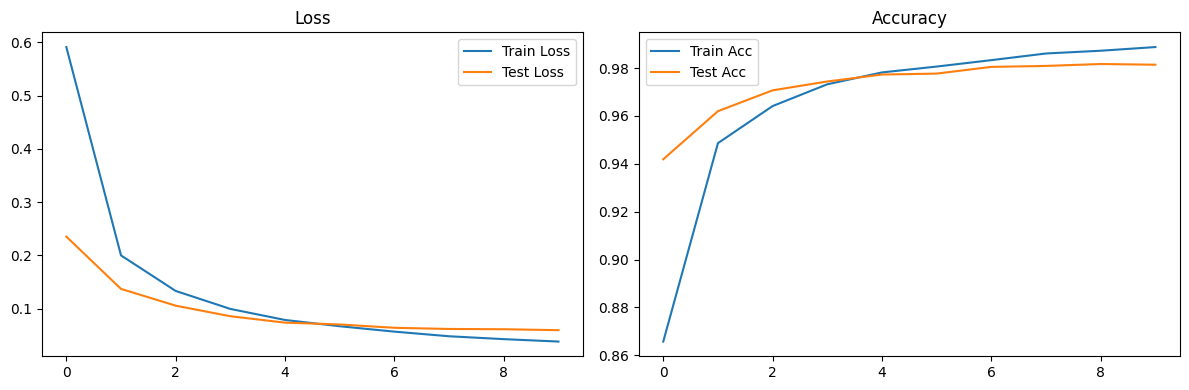

In [34]:
def train_input_model(path:str, device=torch.device('cuda:0')):
    model = create_model_from_config(path)
    model = nn.DataParallel(model)
    model.to(device)
    train_loader, test_loader = get_mnist_loaders(batch_size=1024)
    epochs = 10
    history = train_model(model, train_loader, test_loader, False, epochs=epochs, device=str(device))
    print(f"Model parameters: {count_parameters(model)}")
    plot_training_history(history)

torch.backends.cudnn.benchmark = True
train_input_model('configs/1-2/nn_layer_3_modified.json')

## 2.1 Сравнение моделей разной ширины

Создадим 4 JSON файла с такой конфигурацией, чтобы у каждой нейросети было ровно 3 линейных слоя соответствующих размеров:
- Узкие слои: [64, 32, 16]
- Средние слои: [256, 128, 64]
- Широкие слои: [1024, 512, 256]
- Очень широкие слои: [2048, 1024, 512]

Исходя из результатов обучения на графиках, можно утверждать, что слишком узкие слои имеют невысокую точность, а слишком широкие неэффективны. Оптимальным вариантом эффективности и точности является нейросеть со средней глубиной слоя.

100%|██████████| 10/10 [00:01<00:00,  6.67it/s]


Epoch 1/5:
Train Loss: 1.4910, Train Acc: 0.7131
Test Loss: 0.8228, Test Acc: 0.8877
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.68it/s]


Epoch 2/5:
Train Loss: 0.6401, Train Acc: 0.8901
Test Loss: 0.3566, Test Acc: 0.9263
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.25it/s]


Epoch 3/5:
Train Loss: 0.3614, Train Acc: 0.9180
Test Loss: 0.2256, Test Acc: 0.9440
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.65it/s]


Epoch 4/5:
Train Loss: 0.2684, Train Acc: 0.9311
Test Loss: 0.1707, Test Acc: 0.9545
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.68it/s]


Epoch 5/5:
Train Loss: 0.2246, Train Acc: 0.9406
Test Loss: 0.1447, Test Acc: 0.9595
--------------------------------------------------
Model parameters: 53210


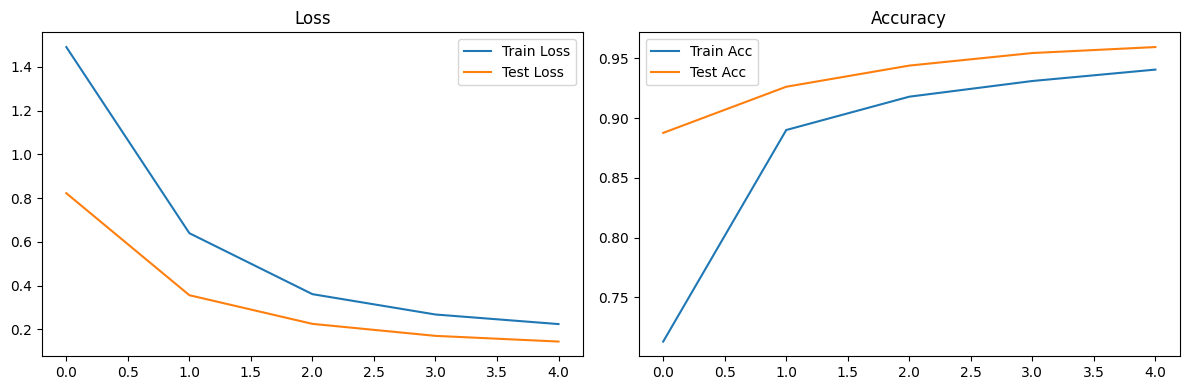

100%|██████████| 10/10 [00:01<00:00,  6.65it/s]


Epoch 1/5:
Train Loss: 0.6080, Train Acc: 0.8557
Test Loss: 0.1904, Test Acc: 0.9442
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.61it/s]


Epoch 2/5:
Train Loss: 0.1640, Train Acc: 0.9516
Test Loss: 0.1158, Test Acc: 0.9659
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.59it/s]


Epoch 3/5:
Train Loss: 0.1098, Train Acc: 0.9671
Test Loss: 0.0898, Test Acc: 0.9733
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.64it/s]


Epoch 4/5:
Train Loss: 0.0847, Train Acc: 0.9737
Test Loss: 0.0805, Test Acc: 0.9745
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.64it/s]


Epoch 5/5:
Train Loss: 0.0684, Train Acc: 0.9787
Test Loss: 0.0716, Test Acc: 0.9776
--------------------------------------------------
Model parameters: 243530


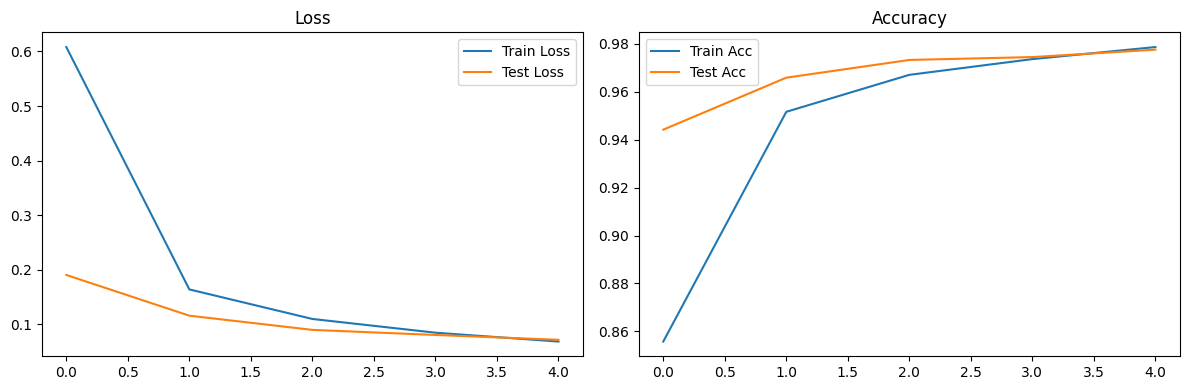

100%|██████████| 10/10 [00:01<00:00,  6.21it/s]


Epoch 1/5:
Train Loss: 0.2912, Train Acc: 0.9149
Test Loss: 0.1086, Test Acc: 0.9666
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.14it/s]


Epoch 2/5:
Train Loss: 0.0858, Train Acc: 0.9733
Test Loss: 0.0803, Test Acc: 0.9749
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.21it/s]


Epoch 3/5:
Train Loss: 0.0588, Train Acc: 0.9807
Test Loss: 0.0780, Test Acc: 0.9763
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.20it/s]


Epoch 4/5:
Train Loss: 0.0433, Train Acc: 0.9855
Test Loss: 0.0713, Test Acc: 0.9776
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.23it/s]


Epoch 5/5:
Train Loss: 0.0353, Train Acc: 0.9878
Test Loss: 0.0669, Test Acc: 0.9798
--------------------------------------------------
Model parameters: 1465610


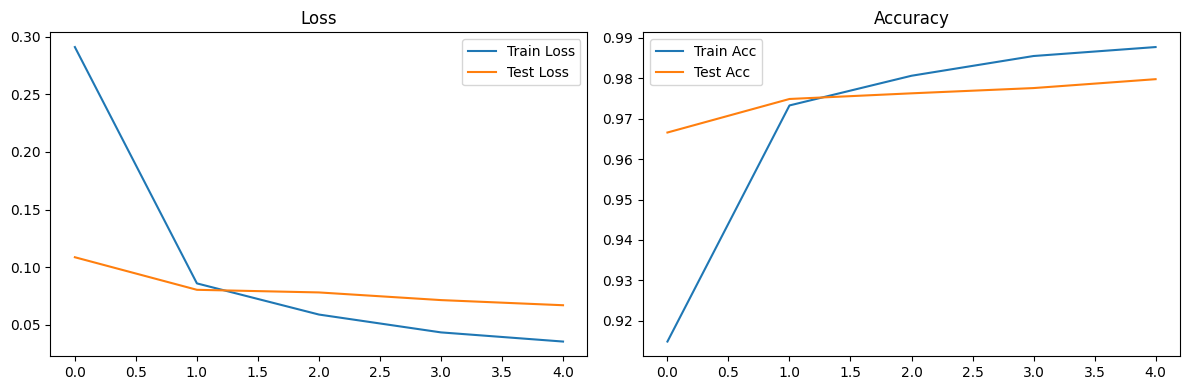

100%|██████████| 10/10 [00:01<00:00,  5.69it/s]


Epoch 1/5:
Train Loss: 0.2357, Train Acc: 0.9267
Test Loss: 0.1141, Test Acc: 0.9653
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.05it/s]


Epoch 2/5:
Train Loss: 0.0753, Train Acc: 0.9764
Test Loss: 0.0773, Test Acc: 0.9748
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  5.62it/s]


Epoch 3/5:
Train Loss: 0.0480, Train Acc: 0.9850
Test Loss: 0.0779, Test Acc: 0.9757
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.23it/s]


Epoch 4/5:
Train Loss: 0.0361, Train Acc: 0.9887
Test Loss: 0.0733, Test Acc: 0.9783
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.28it/s]


Epoch 5/5:
Train Loss: 0.0287, Train Acc: 0.9902
Test Loss: 0.0732, Test Acc: 0.9800
--------------------------------------------------
Model parameters: 4241930


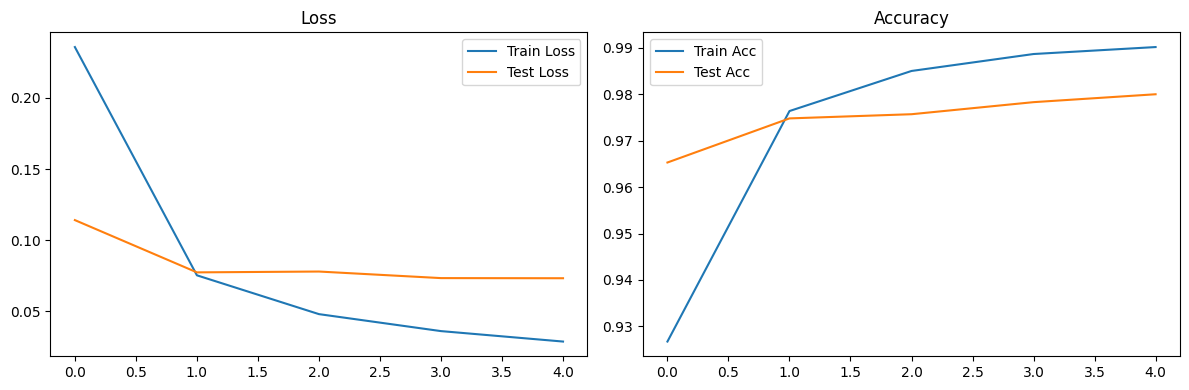

In [36]:
torch.backends.cudnn.benchmark = True
train_input_model('configs/2-1/nn_narrow_layers.json')
train_input_model('configs/2-1/nn_middle_layers.json')
train_input_model('configs/2-1/nn_wide_layers.json')
train_input_model('configs/2-1/nn_widest_layers.json')

## 2.2 Оптимизация архитектуры

После множества экспериментов, а также изменения логики train_model и run_epoch в утилитах для визуализации матрицы, было установлено, что самой оптимальной является модель с сужающимися слоями.



100%|██████████| 10/10 [00:01<00:00,  6.41it/s]


Epoch 1/10:
Train Loss: 0.6187, Train Acc: 0.8532
Test Loss: 0.1966, Test Acc: 0.9436
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.33it/s]


Epoch 2/10:
Train Loss: 0.1680, Train Acc: 0.9519
Test Loss: 0.1133, Test Acc: 0.9676
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.47it/s]


Epoch 3/10:
Train Loss: 0.1107, Train Acc: 0.9673
Test Loss: 0.0885, Test Acc: 0.9720
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.56it/s]


Epoch 4/10:
Train Loss: 0.0842, Train Acc: 0.9749
Test Loss: 0.0783, Test Acc: 0.9756
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.50it/s]


Epoch 5/10:
Train Loss: 0.0680, Train Acc: 0.9791
Test Loss: 0.0748, Test Acc: 0.9777
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.17it/s]


Epoch 6/10:
Train Loss: 0.0579, Train Acc: 0.9818
Test Loss: 0.0673, Test Acc: 0.9798
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.54it/s]


Epoch 7/10:
Train Loss: 0.0494, Train Acc: 0.9841
Test Loss: 0.0649, Test Acc: 0.9799
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.36it/s]


Epoch 8/10:
Train Loss: 0.0449, Train Acc: 0.9856
Test Loss: 0.0647, Test Acc: 0.9810
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.40it/s]


Epoch 9/10:
Train Loss: 0.0392, Train Acc: 0.9873
Test Loss: 0.0615, Test Acc: 0.9812
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.20it/s]


Epoch 10/10:
Train Loss: 0.0351, Train Acc: 0.9884
Test Loss: 0.0698, Test Acc: 0.9801
--------------------------------------------------
Model parameters: 243530


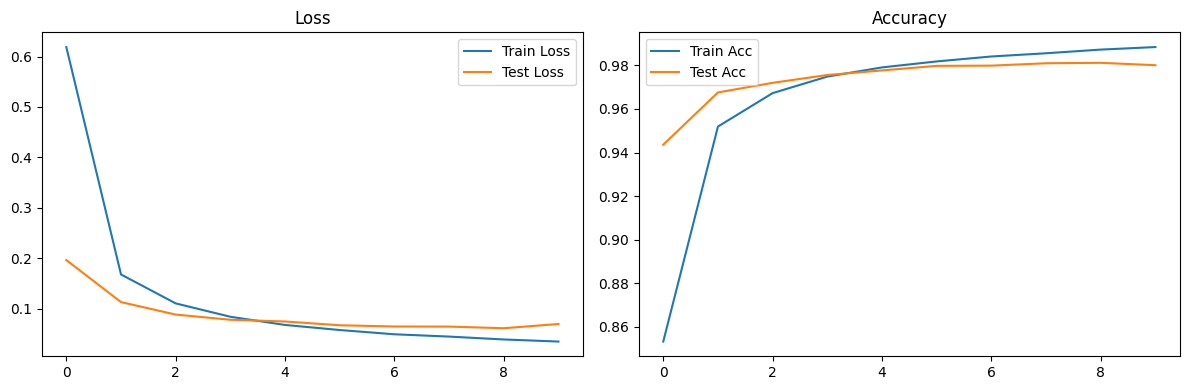

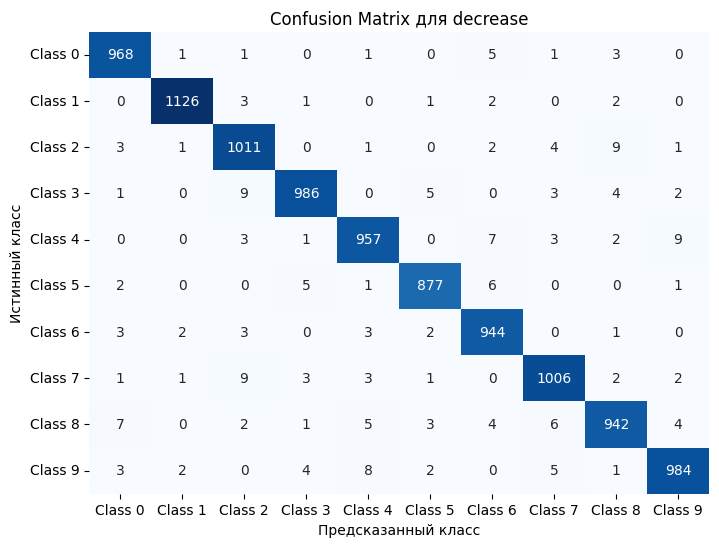

100%|██████████| 10/10 [00:01<00:00,  6.30it/s]


Epoch 1/10:
Train Loss: 0.6560, Train Acc: 0.8200
Test Loss: 0.2090, Test Acc: 0.9353
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.48it/s]


Epoch 2/10:
Train Loss: 0.2380, Train Acc: 0.9283
Test Loss: 0.1469, Test Acc: 0.9559
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.53it/s]


Epoch 3/10:
Train Loss: 0.1851, Train Acc: 0.9430
Test Loss: 0.1267, Test Acc: 0.9624
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.54it/s]


Epoch 4/10:
Train Loss: 0.1588, Train Acc: 0.9508
Test Loss: 0.1114, Test Acc: 0.9655
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.52it/s]


Epoch 5/10:
Train Loss: 0.1409, Train Acc: 0.9560
Test Loss: 0.1080, Test Acc: 0.9669
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.44it/s]


Epoch 6/10:
Train Loss: 0.1271, Train Acc: 0.9607
Test Loss: 0.1036, Test Acc: 0.9681
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  5.90it/s]


Epoch 7/10:
Train Loss: 0.1194, Train Acc: 0.9624
Test Loss: 0.0961, Test Acc: 0.9715
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.56it/s]


Epoch 8/10:
Train Loss: 0.1081, Train Acc: 0.9661
Test Loss: 0.0916, Test Acc: 0.9725
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.49it/s]


Epoch 9/10:
Train Loss: 0.1033, Train Acc: 0.9667
Test Loss: 0.0890, Test Acc: 0.9743
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.44it/s]


Epoch 10/10:
Train Loss: 0.0951, Train Acc: 0.9692
Test Loss: 0.0867, Test Acc: 0.9745
--------------------------------------------------
Model parameters: 94538


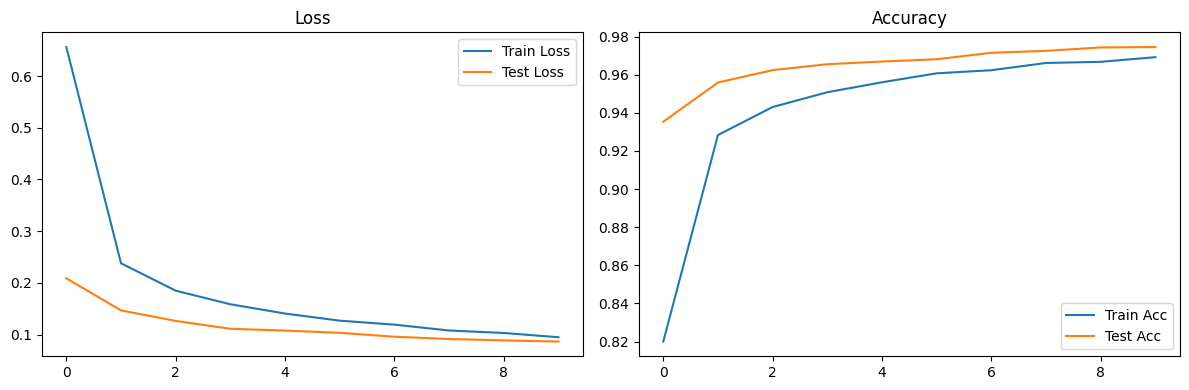

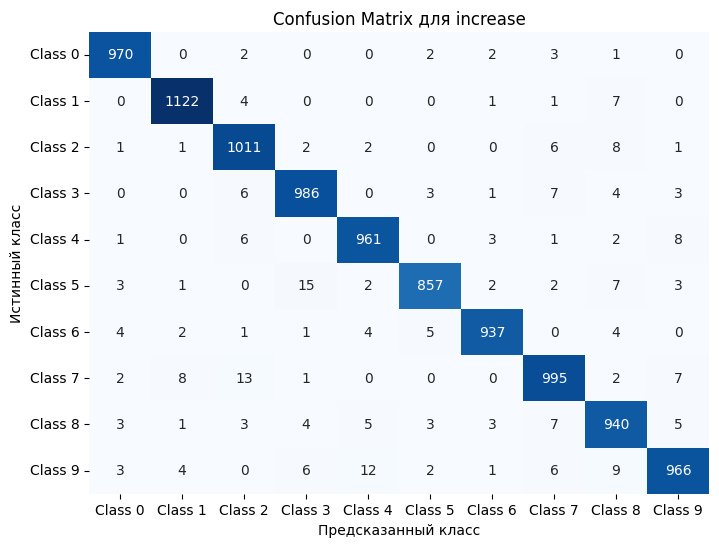

100%|██████████| 10/10 [00:01<00:00,  6.44it/s]


Epoch 1/10:
Train Loss: 0.6498, Train Acc: 0.8313
Test Loss: 0.2184, Test Acc: 0.9327
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.48it/s]


Epoch 2/10:
Train Loss: 0.1922, Train Acc: 0.9422
Test Loss: 0.1236, Test Acc: 0.9607
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.52it/s]


Epoch 3/10:
Train Loss: 0.1398, Train Acc: 0.9574
Test Loss: 0.0993, Test Acc: 0.9703
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.51it/s]


Epoch 4/10:
Train Loss: 0.1112, Train Acc: 0.9658
Test Loss: 0.0873, Test Acc: 0.9727
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.47it/s]


Epoch 5/10:
Train Loss: 0.0950, Train Acc: 0.9707
Test Loss: 0.0827, Test Acc: 0.9751
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.56it/s]


Epoch 6/10:
Train Loss: 0.0844, Train Acc: 0.9732
Test Loss: 0.0727, Test Acc: 0.9760
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.40it/s]


Epoch 7/10:
Train Loss: 0.0751, Train Acc: 0.9755
Test Loss: 0.0750, Test Acc: 0.9788
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.56it/s]


Epoch 8/10:
Train Loss: 0.0684, Train Acc: 0.9786
Test Loss: 0.0746, Test Acc: 0.9765
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.49it/s]


Epoch 9/10:
Train Loss: 0.0620, Train Acc: 0.9796
Test Loss: 0.0692, Test Acc: 0.9798
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.58it/s]


Epoch 10/10:
Train Loss: 0.0563, Train Acc: 0.9816
Test Loss: 0.0664, Test Acc: 0.9788
--------------------------------------------------
Model parameters: 135306


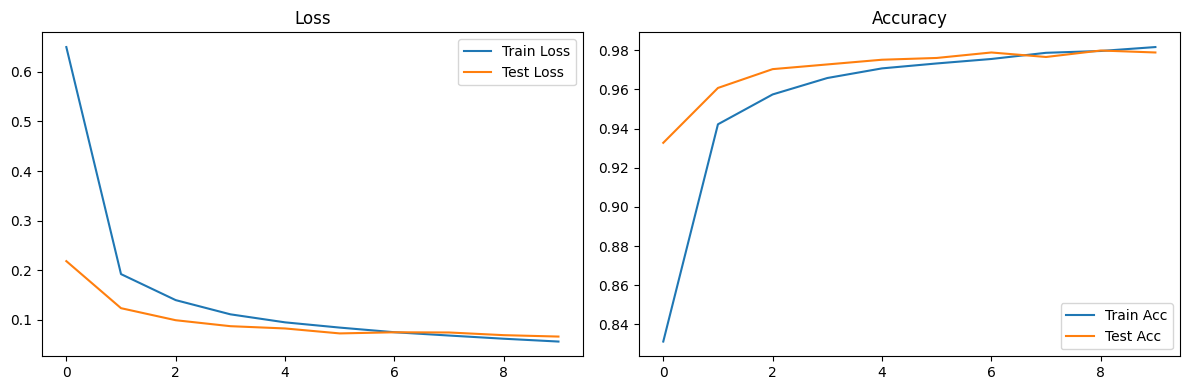

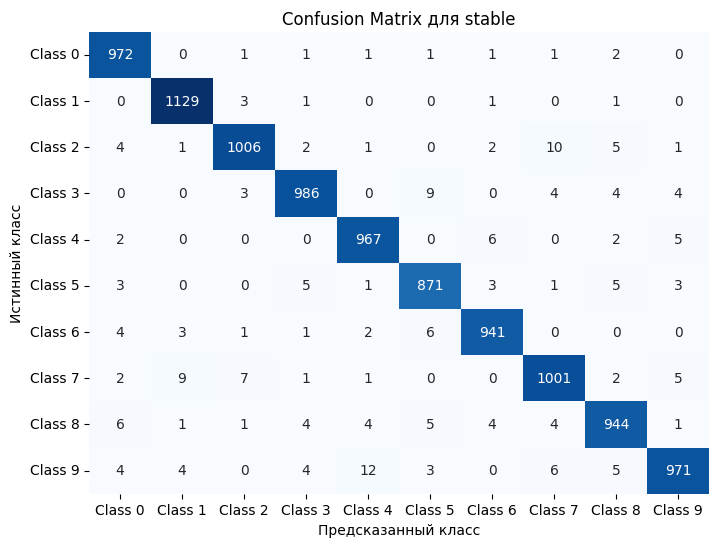

In [4]:
def train_model_for_optimization(path:str, model_name:str, device=torch.device('cuda:0')):
    model = create_model_from_config(path)
    model = nn.DataParallel(model)
    model.to(device)
    train_loader, test_loader = get_mnist_loaders(batch_size=1024)
    epochs = 10
    history = train_model(model, train_loader, test_loader, False, epochs=epochs, device=str(device))
    print(f"Model parameters: {count_parameters(model)}")
    plot_training_history(history)
    plot_confusion_matrix(
        all_true_labels=history['final_test_true_labels'],
        all_preds=history['final_test_preds'],
        num_classes=10,
        model_name=model_name
    )

torch.backends.cudnn.benchmark = True
train_model_for_optimization('configs/nn_middle_decrease.json', "decrease")
train_model_for_optimization('configs/2-2/nn_middle_increase.json', "increase")
train_model_for_optimization('configs/2-2/nn_middle_stable.json', "stable")

## 3.1 Сравнение техник регуляризации

Утилиты вновь были изменены. На сей раз добавлена булева переменная L2 - если истина, то мы выполняем L2 регуляризацию, это нужно явно прописать в оптимизаторе. В остальных случаях проводим AdamW (более эффективная) оптимизацию с указанными дополнительными слоями в конфиге.

По итоговым графикам распределения весов и Accuracy можно однозначно говорить о том, что Dropout + BatchNorm регуляризация является самой оптимальной по точности и стабильности.



100%|██████████| 10/10 [00:01<00:00,  6.88it/s]


Epoch 1/5:
Train Loss: 0.5850, Train Acc: 0.8380
Test Loss: 0.2940, Test Acc: 0.9144
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.69it/s]


Epoch 2/5:
Train Loss: 0.3003, Train Acc: 0.9142
Test Loss: 0.2936, Test Acc: 0.9139
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.78it/s]


Epoch 3/5:
Train Loss: 0.2878, Train Acc: 0.9188
Test Loss: 0.2865, Test Acc: 0.9207
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.77it/s]


Epoch 4/5:
Train Loss: 0.2825, Train Acc: 0.9189
Test Loss: 0.2896, Test Acc: 0.9164
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.54it/s]


Epoch 5/5:
Train Loss: 0.2756, Train Acc: 0.9228
Test Loss: 0.2759, Test Acc: 0.9232
--------------------------------------------------
Model parameters: 242762


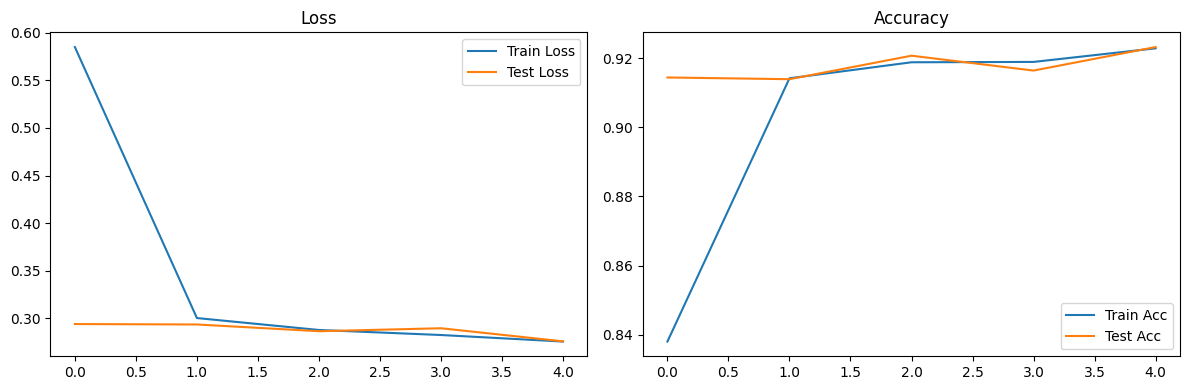

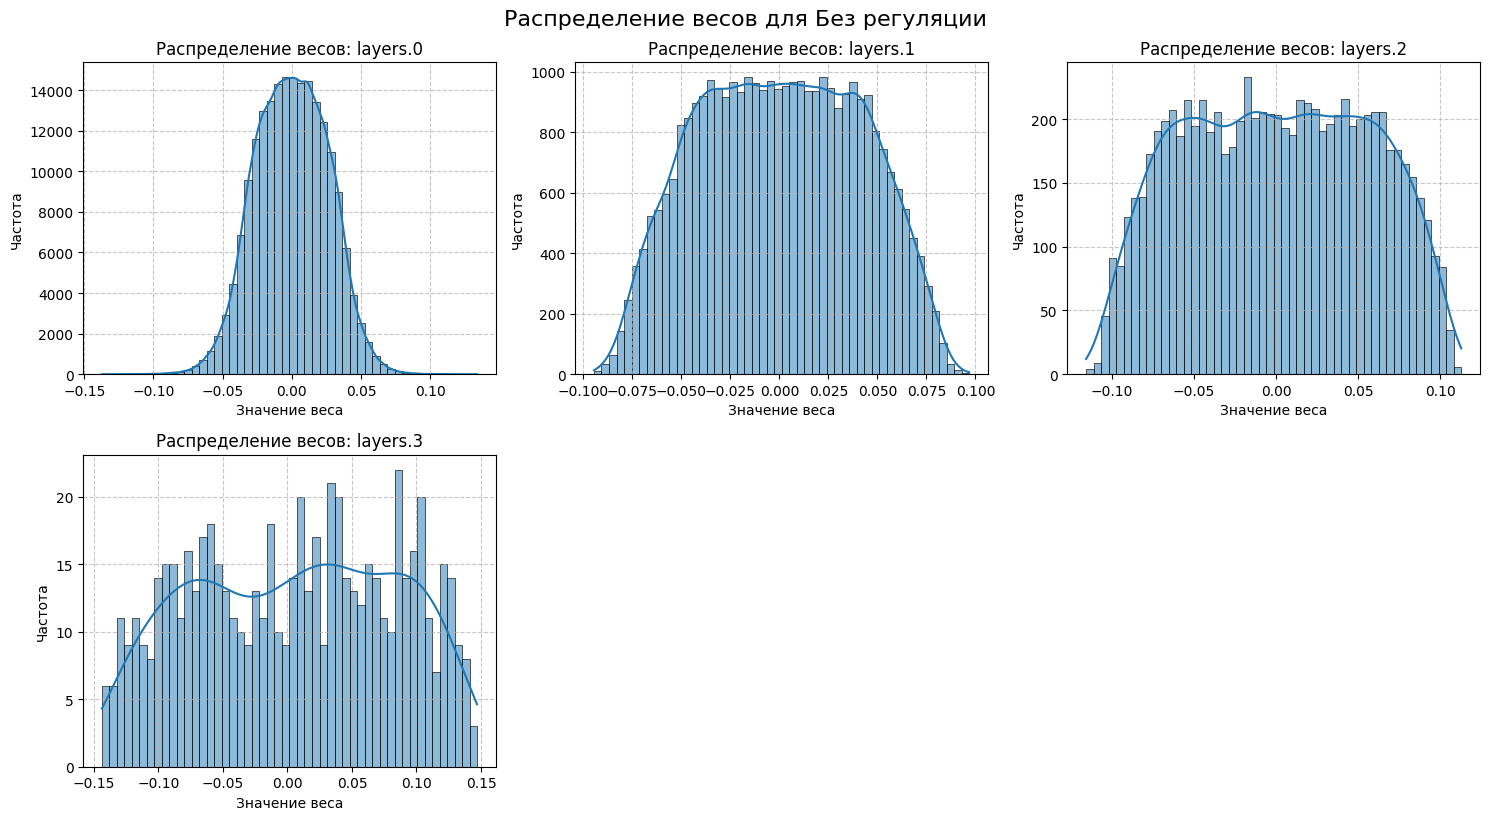

100%|██████████| 10/10 [00:01<00:00,  6.63it/s]


Epoch 1/5:
Train Loss: 0.5877, Train Acc: 0.8320
Test Loss: 0.3050, Test Acc: 0.9146
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.68it/s]


Epoch 2/5:
Train Loss: 0.3111, Train Acc: 0.9100
Test Loss: 0.2802, Test Acc: 0.9192
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.71it/s]


Epoch 3/5:
Train Loss: 0.2951, Train Acc: 0.9157
Test Loss: 0.2802, Test Acc: 0.9175
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.61it/s]


Epoch 4/5:
Train Loss: 0.2938, Train Acc: 0.9159
Test Loss: 0.2843, Test Acc: 0.9178
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.67it/s]


Epoch 5/5:
Train Loss: 0.2854, Train Acc: 0.9192
Test Loss: 0.2753, Test Acc: 0.9231
--------------------------------------------------
Model parameters: 242762


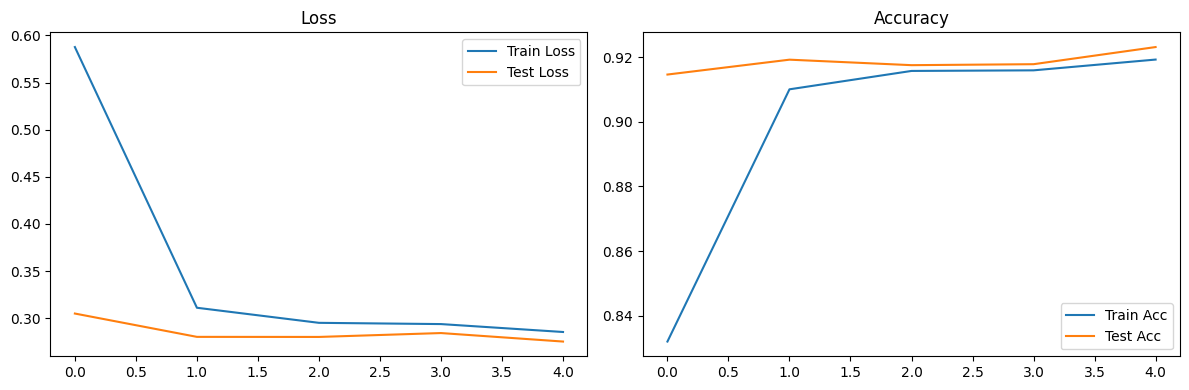

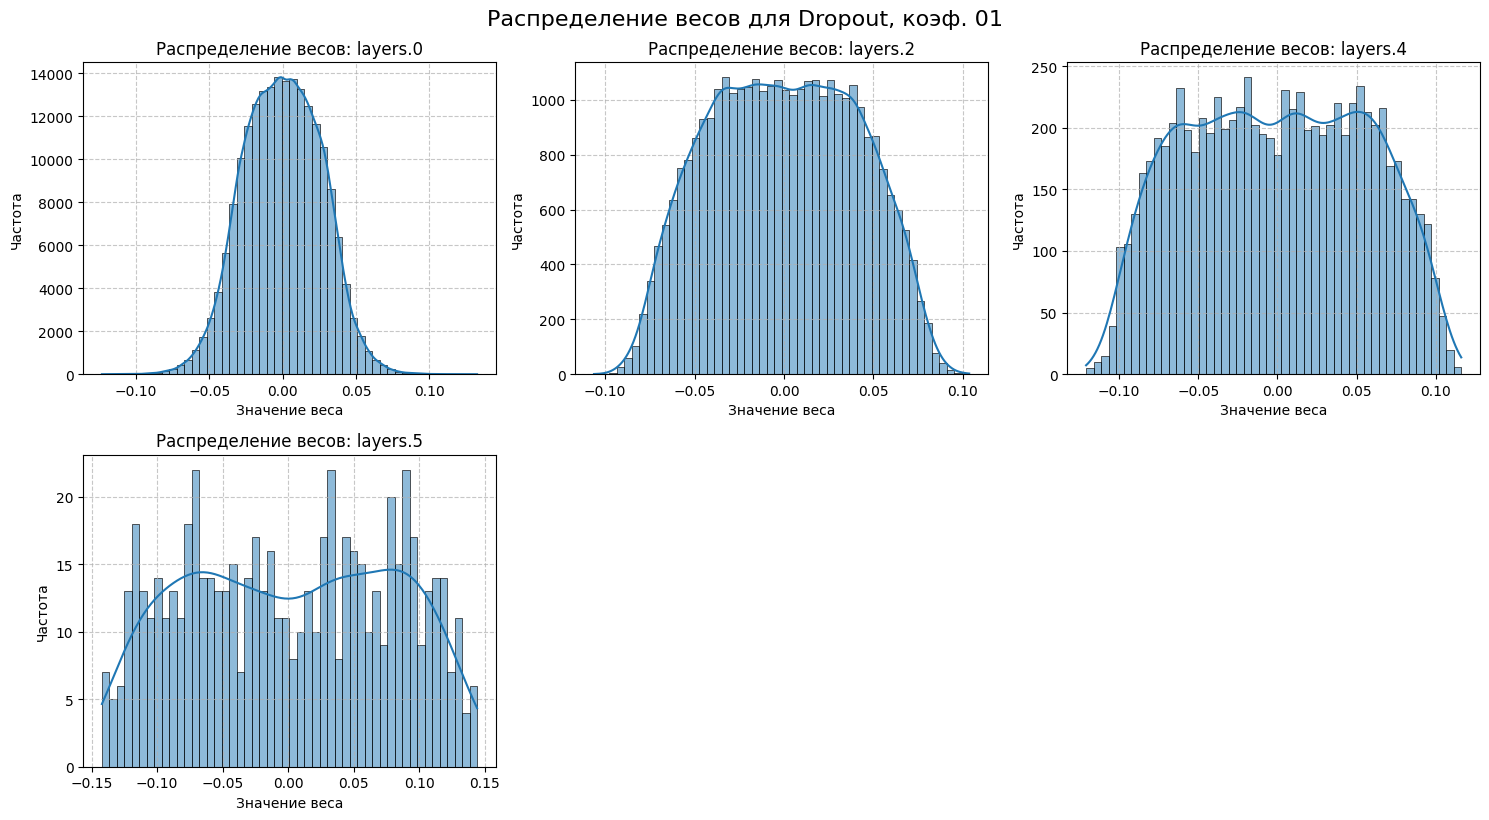

100%|██████████| 10/10 [00:01<00:00,  6.58it/s]


Epoch 1/5:
Train Loss: 0.6326, Train Acc: 0.8186
Test Loss: 0.2997, Test Acc: 0.9114
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Epoch 2/5:
Train Loss: 0.3405, Train Acc: 0.9020
Test Loss: 0.2808, Test Acc: 0.9198
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.08it/s]


Epoch 3/5:
Train Loss: 0.3256, Train Acc: 0.9068
Test Loss: 0.2911, Test Acc: 0.9152
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.70it/s]


Epoch 4/5:
Train Loss: 0.3174, Train Acc: 0.9099
Test Loss: 0.2799, Test Acc: 0.9204
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.59it/s]


Epoch 5/5:
Train Loss: 0.3118, Train Acc: 0.9114
Test Loss: 0.2805, Test Acc: 0.9188
--------------------------------------------------
Model parameters: 242762


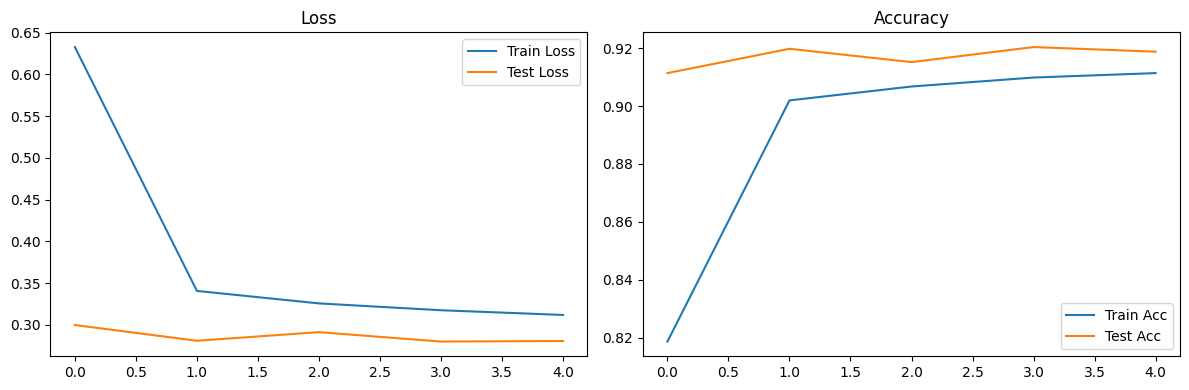

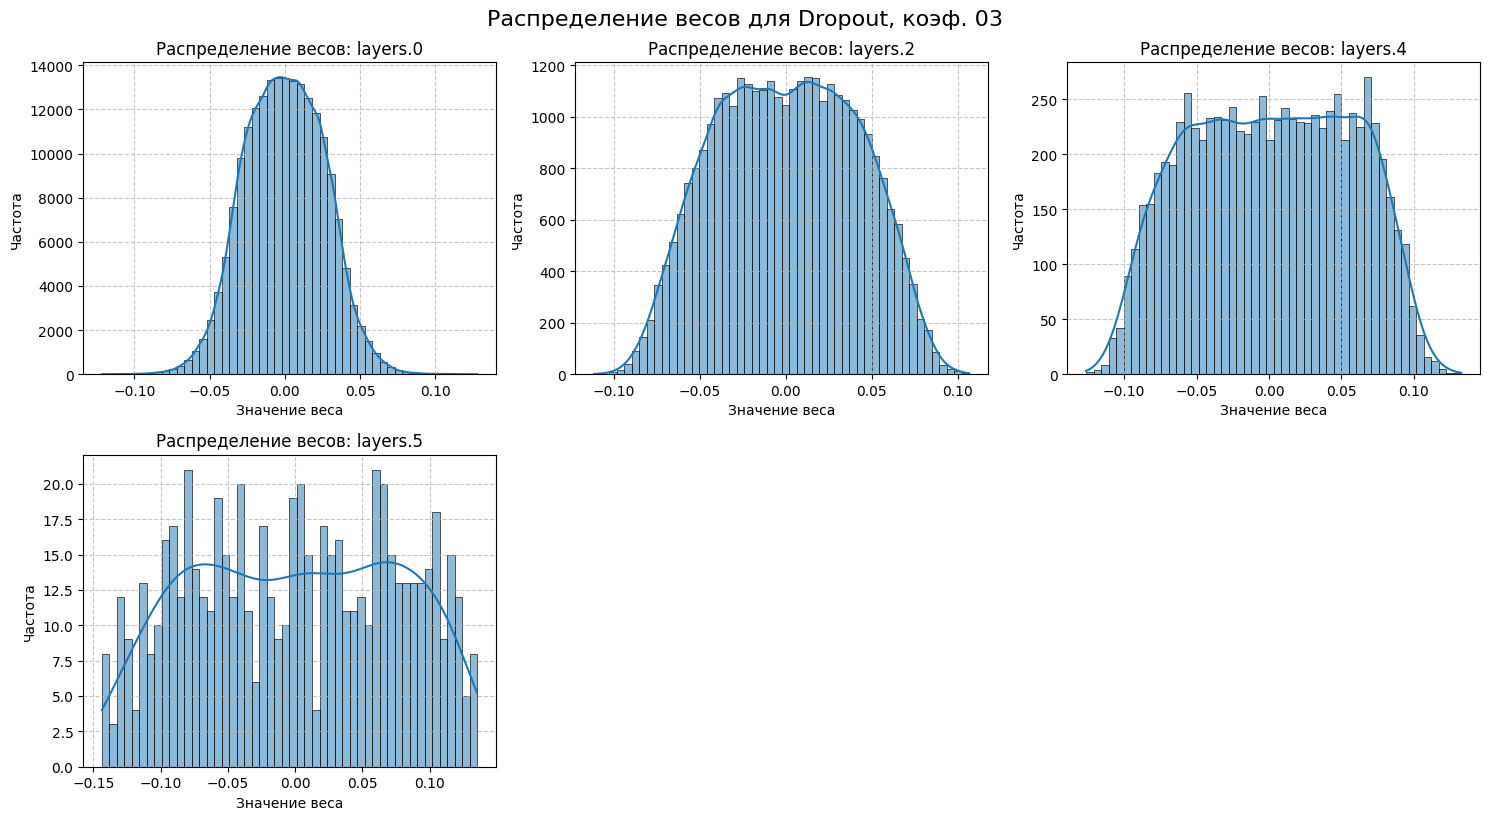

100%|██████████| 10/10 [00:01<00:00,  6.75it/s]


Epoch 1/5:
Train Loss: 0.7001, Train Acc: 0.7938
Test Loss: 0.3250, Test Acc: 0.9053
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.69it/s]


Epoch 2/5:
Train Loss: 0.3897, Train Acc: 0.8879
Test Loss: 0.2964, Test Acc: 0.9145
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.40it/s]


Epoch 3/5:
Train Loss: 0.3702, Train Acc: 0.8939
Test Loss: 0.2829, Test Acc: 0.9192
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.67it/s]


Epoch 4/5:
Train Loss: 0.3626, Train Acc: 0.8969
Test Loss: 0.2828, Test Acc: 0.9191
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  5.57it/s]


Epoch 5/5:
Train Loss: 0.3544, Train Acc: 0.9003
Test Loss: 0.2870, Test Acc: 0.9162
--------------------------------------------------
Model parameters: 242762


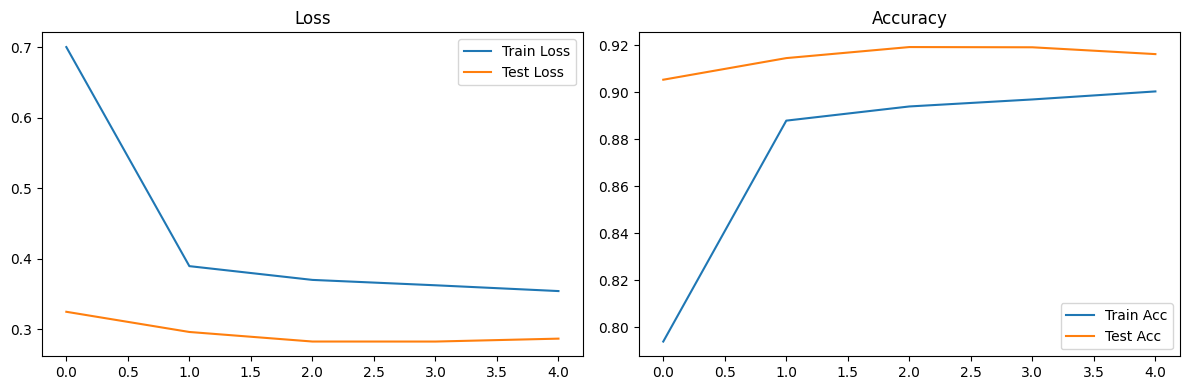

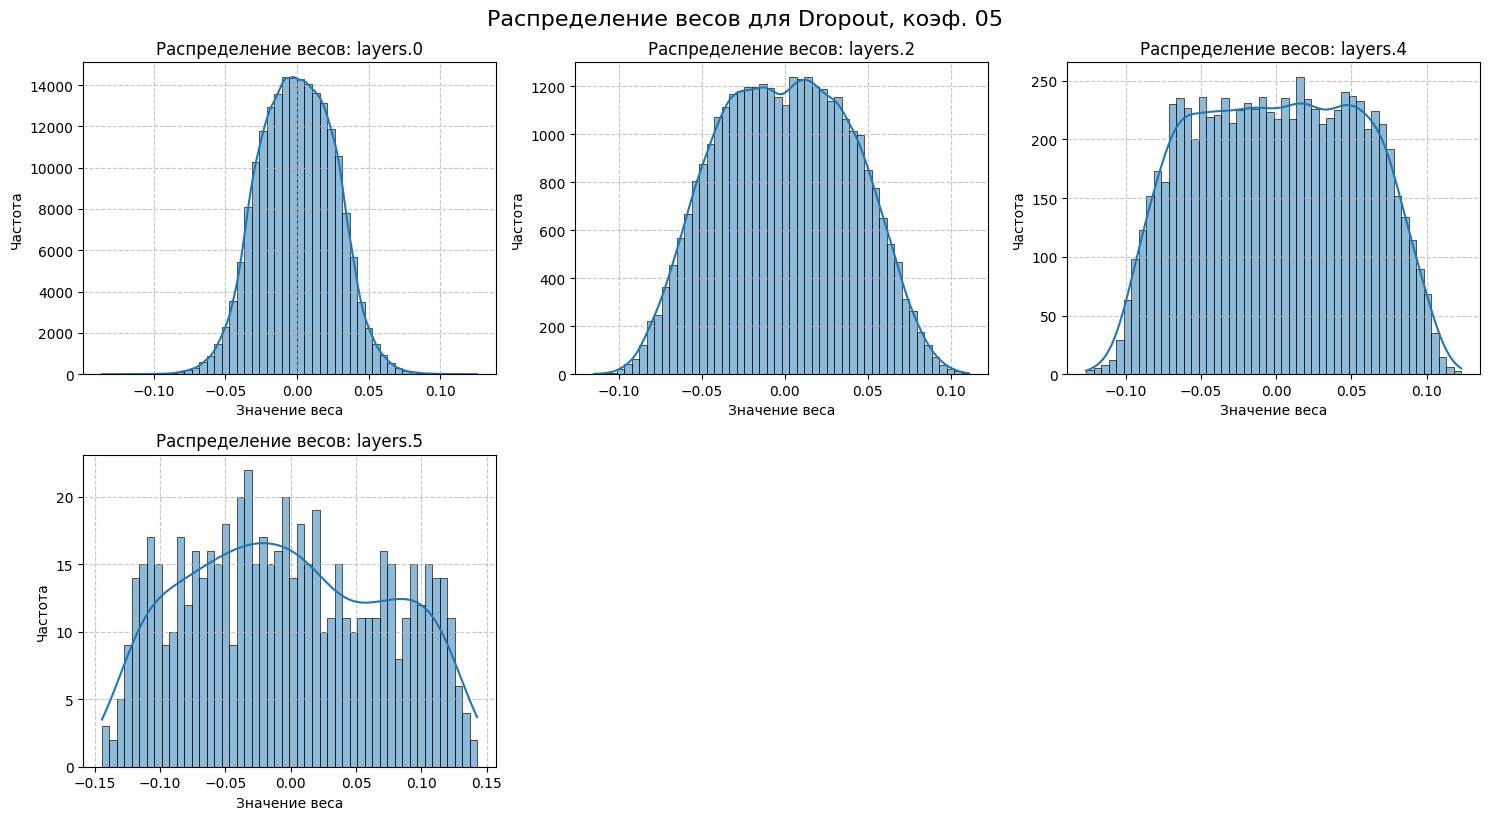

100%|██████████| 10/10 [00:01<00:00,  6.62it/s]


Epoch 1/5:
Train Loss: 0.5382, Train Acc: 0.8597
Test Loss: 0.3163, Test Acc: 0.9097
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.60it/s]


Epoch 2/5:
Train Loss: 0.3041, Train Acc: 0.9146
Test Loss: 0.2823, Test Acc: 0.9206
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.69it/s]


Epoch 3/5:
Train Loss: 0.2903, Train Acc: 0.9188
Test Loss: 0.2846, Test Acc: 0.9204
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.62it/s]


Epoch 4/5:
Train Loss: 0.2795, Train Acc: 0.9215
Test Loss: 0.2805, Test Acc: 0.9210
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.55it/s]


Epoch 5/5:
Train Loss: 0.2745, Train Acc: 0.9242
Test Loss: 0.2812, Test Acc: 0.9195
--------------------------------------------------
Model parameters: 243530


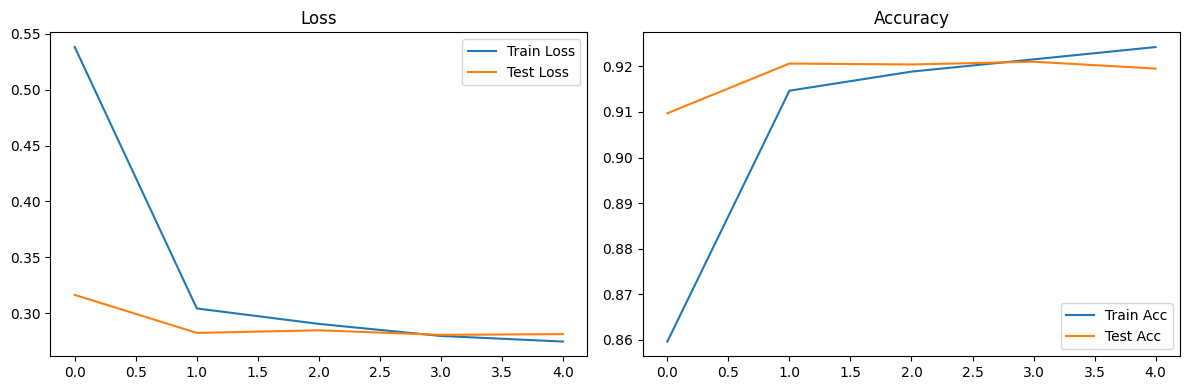

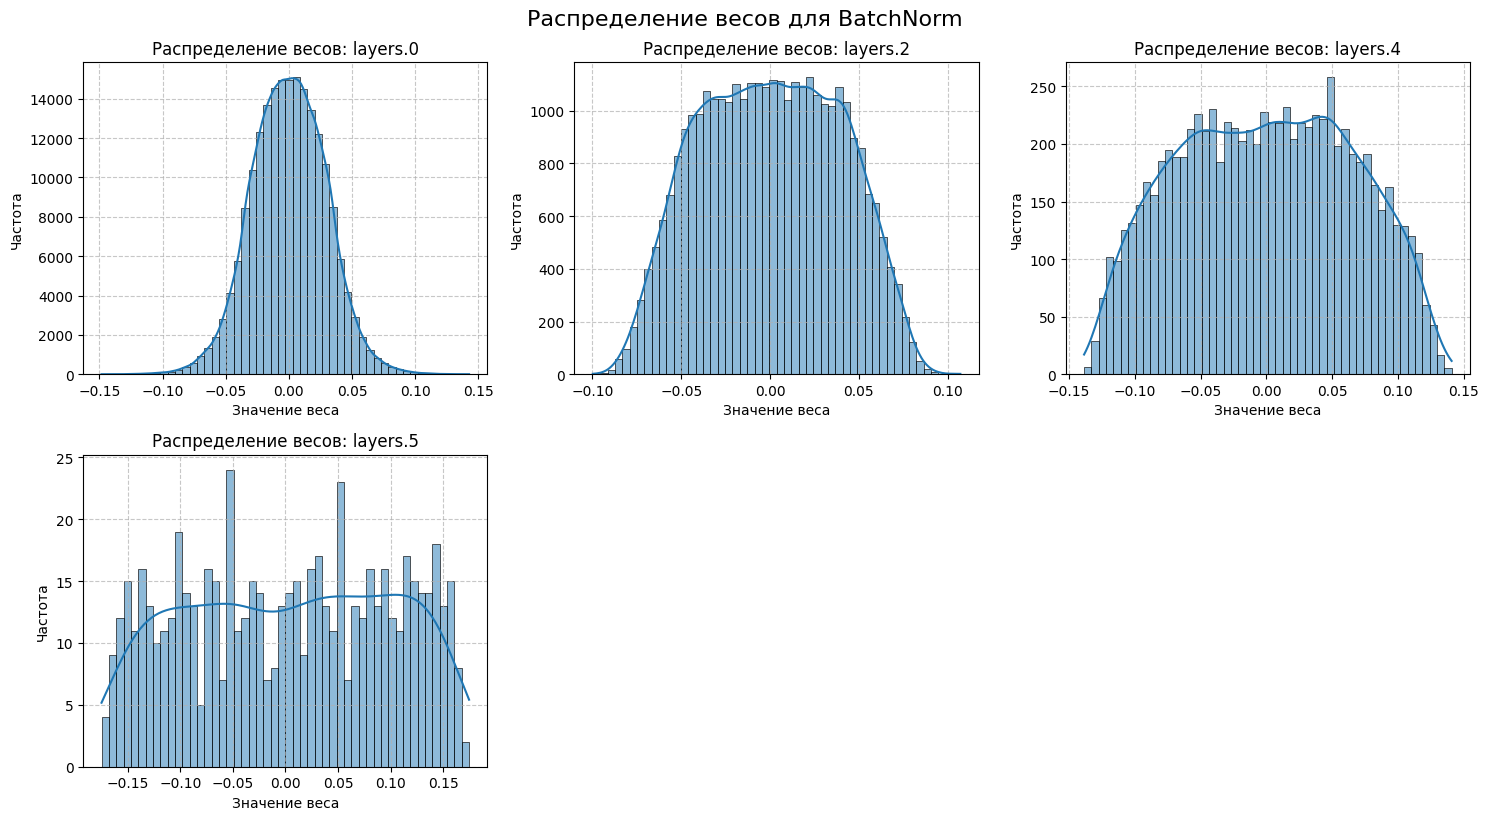

100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Epoch 1/5:
Train Loss: 0.6003, Train Acc: 0.8390
Test Loss: 0.3143, Test Acc: 0.9096
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.56it/s]


Epoch 2/5:
Train Loss: 0.3396, Train Acc: 0.9026
Test Loss: 0.2887, Test Acc: 0.9172
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.61it/s]


Epoch 3/5:
Train Loss: 0.3215, Train Acc: 0.9100
Test Loss: 0.2910, Test Acc: 0.9175
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.65it/s]


Epoch 4/5:
Train Loss: 0.3124, Train Acc: 0.9115
Test Loss: 0.2799, Test Acc: 0.9217
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.60it/s]


Epoch 5/5:
Train Loss: 0.3063, Train Acc: 0.9138
Test Loss: 0.2817, Test Acc: 0.9211
--------------------------------------------------
Model parameters: 243530


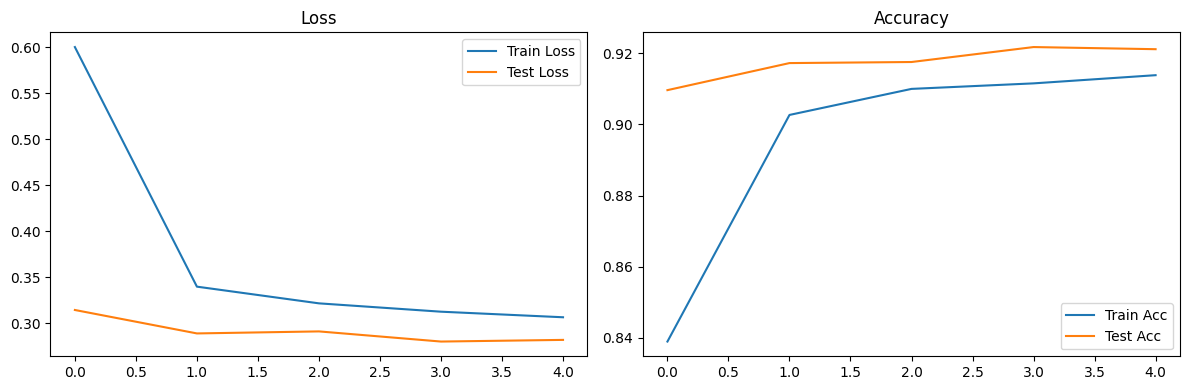

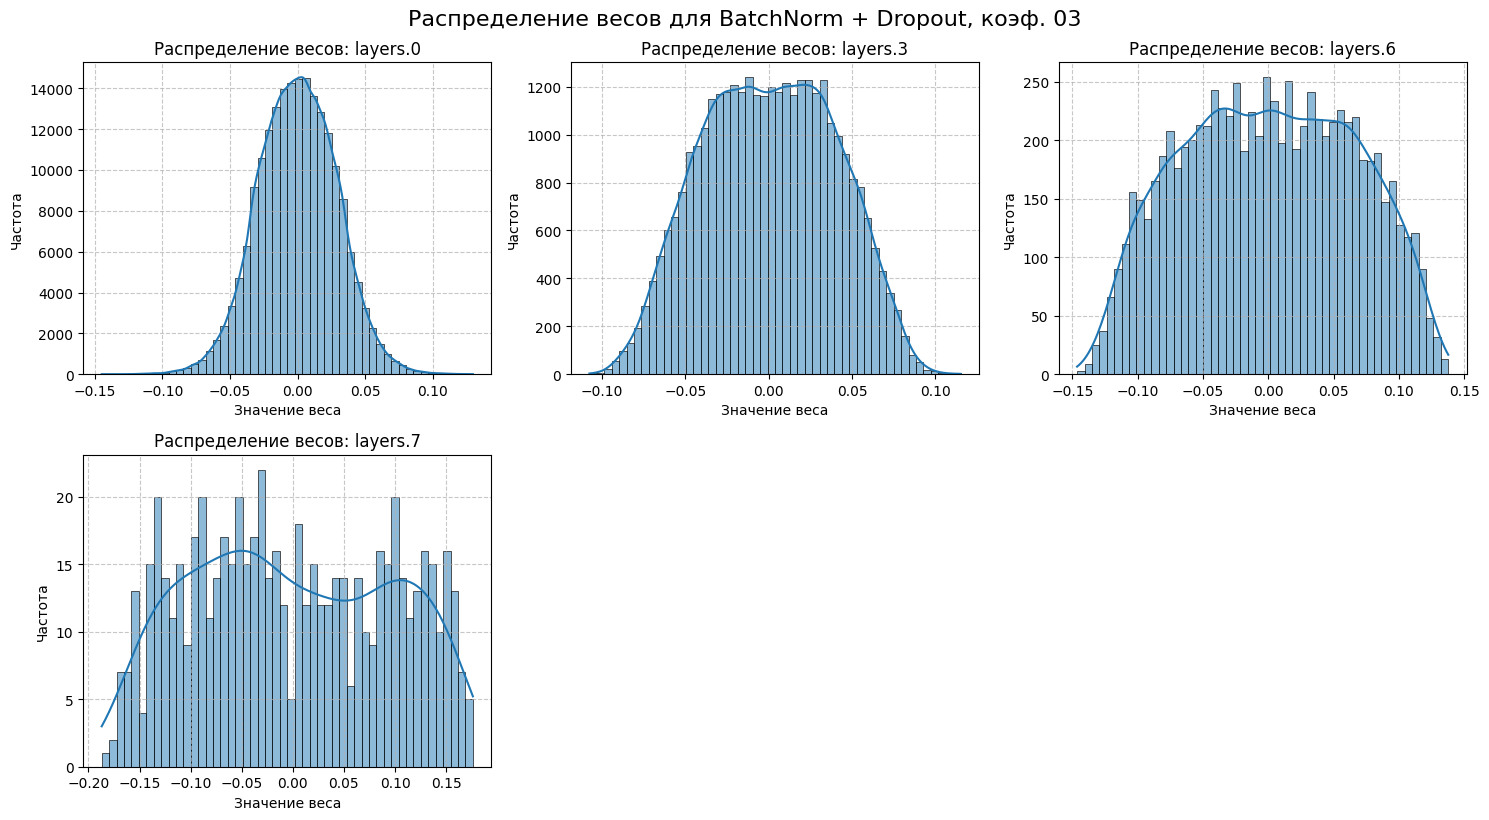

100%|██████████| 10/10 [00:01<00:00,  6.73it/s]


Epoch 1/5:
Train Loss: 0.5733, Train Acc: 0.8382
Test Loss: 0.3091, Test Acc: 0.9112
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.64it/s]


Epoch 2/5:
Train Loss: 0.3021, Train Acc: 0.9137
Test Loss: 0.2830, Test Acc: 0.9211
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.62it/s]


Epoch 3/5:
Train Loss: 0.2878, Train Acc: 0.9188
Test Loss: 0.2785, Test Acc: 0.9213
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.63it/s]


Epoch 4/5:
Train Loss: 0.2808, Train Acc: 0.9216
Test Loss: 0.2809, Test Acc: 0.9228
--------------------------------------------------


100%|██████████| 10/10 [00:01<00:00,  6.59it/s]


Epoch 5/5:
Train Loss: 0.2762, Train Acc: 0.9230
Test Loss: 0.2783, Test Acc: 0.9226
--------------------------------------------------
Model parameters: 242762


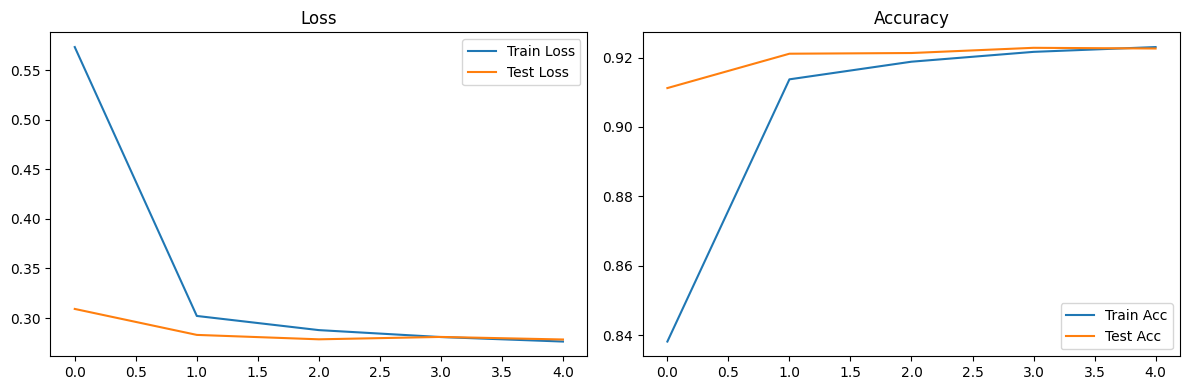

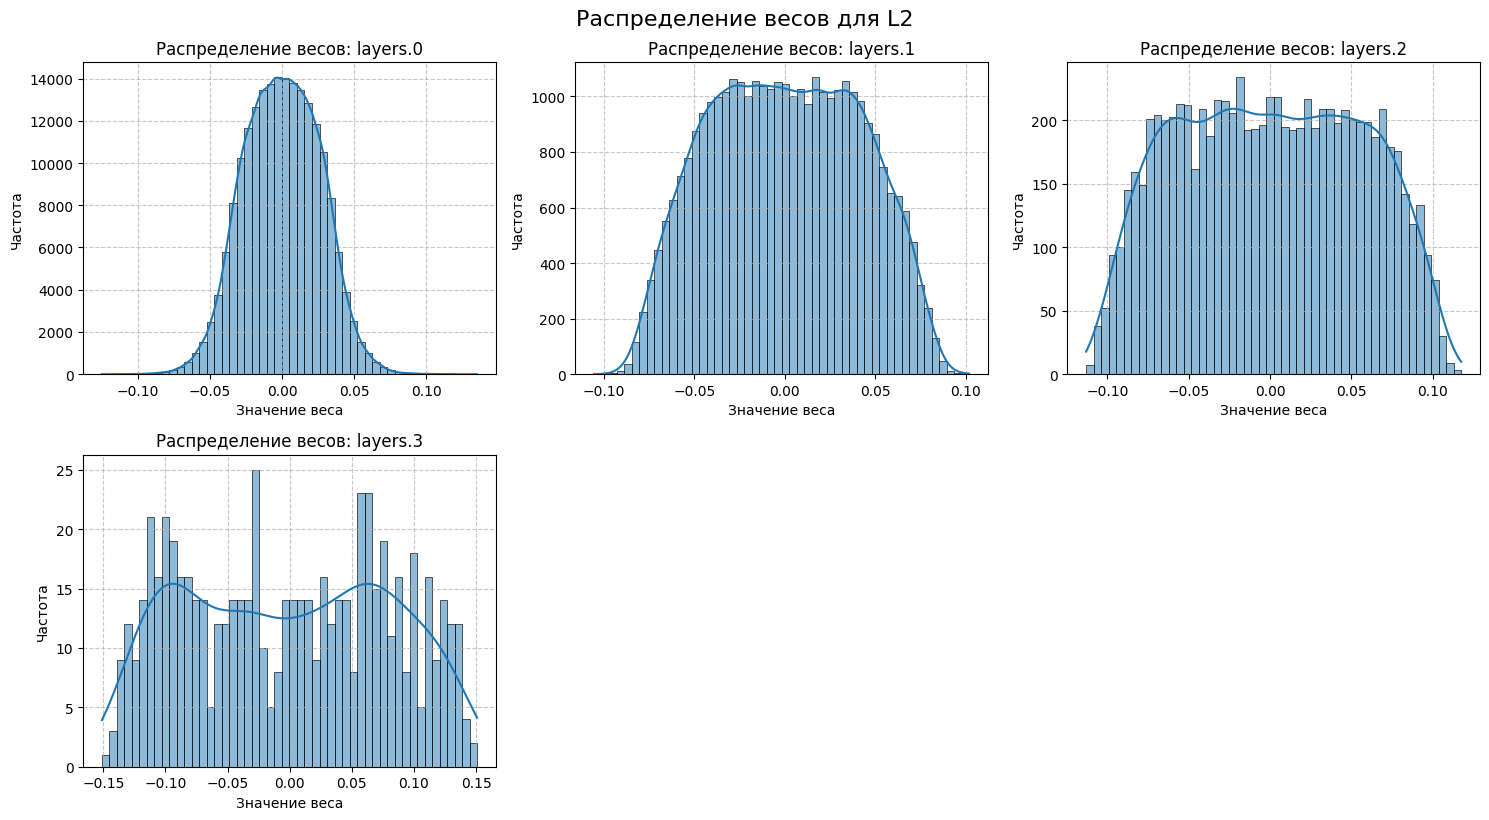

In [2]:
def regularization_input_model(path:str, name:str, L2, device=torch.device('cuda:0')):
    model = create_model_from_config(path)
    model = nn.DataParallel(model)
    model.to(device)
    train_loader, test_loader = get_mnist_loaders(batch_size=1024)
    epochs = 5
    history = train_model(model, train_loader, test_loader, L2, epochs=epochs, device=str(device))
    print(f"Model parameters: {count_parameters(model)}")
    plot_training_history(history)
    plot_weights_distribution(model, model_name=name)

torch.backends.cudnn.benchmark = True
regularization_input_model('configs/3-1/nn_middle_noreg.json', 'Без регуляции',False)
regularization_input_model('configs/3-1/nn_middle_drop_01.json', 'Dropout, коэф. 01', False)
regularization_input_model('configs/3-1/nn_middle_drop_03.json', 'Dropout, коэф. 03', False)
regularization_input_model('configs/3-1/nn_middle_drop_05.json', 'Dropout, коэф. 05', False)
regularization_input_model('configs/3-1/nn_middle_batch.json', 'BatchNorm', False)
regularization_input_model('configs/3-1/nn_middle_drop_batch.json', 'BatchNorm + Dropout, коэф. 03', False)
regularization_input_model('configs/3-1/nn_middle_noreg.json', 'L2', True)